<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [580]:
import sympy as sp
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
x=sp.Symbol('x')
f = x*sp.sin(5*x) + 0.1*x**2
print(f)
df = sp.diff(x*sp.sin(5*x) + 0.1*x**2)
print(df)

0.1*x**2 + x*sin(5*x)
5*x*cos(5*x) + 0.2*x + sin(5*x)


In [207]:
def f(x):
    
    '''
    Расчет значения функции в точке  
    '''
    
    return x*sp.sin(5*x) + 0.1*x**2

def df(t):
   
   '''
   Расчет значения производной в точке  
   '''
   return sp.diff(x*sp.sin(5*x) + 0.1*x**2).subs(x, t)


def gradient_descent(f, df, w0, learning_rate, epsilon, num_iterations):
    
    ''' 
    Функция, реализующая градиентный спуск, 
    сохраняющая значения весов и функции потерь 
    '''
    
    w_curr = w0
    weights = [w_curr]
    trace = [f(w_curr)]

    for i in range(num_iterations):
      w_new = w_curr - learning_rate * df(w_curr)
      weights.append(w_new)
      trace.append(f(w_new))

      if abs(w_new - w_curr) < epsilon:
        return w_curr, weights, trace

      w_curr = w_new

    return w_curr, weights, trace


# Поиск экстремумов
def find_points(weights, trace):
    
    ''' 
    Поиск максимального и минимального значений градиентного спуска 
    '''
    min_loss = min(trace)
    min_weight = weights[trace.index(min_loss)]

    max_loss = max(trace)
    max_weights=weights[trace.index(max_loss)]


    return f'Минимум {min_weight, min_loss}\nМаксимум {max_weights, max_loss}'
  


def GD_graph(weights):
   plt.figure(figsize=(10,10))

   x_values = [x for x in np.arange(-5, 5, 0.1)]
   f_values = [f(x) for x in x_values]
   
   plt.axvline(x=0, c = 'black')
   plt.axhline(y=0, c = 'black')
   
   plt.plot(x_values, f_values)

   plt.title('График функции f(x) c экстремумами и точками перегиба') 

   plt.xlabel('x')
   plt.ylabel('f(x)')

   gd_steps = [f(x) for x in weights]
   plt.scatter(weights, gd_steps, c='red')

   plt.show()
   

0
[0, 0]
[0, 0]
Минимум (0, 0)
Максимум (0, 0)


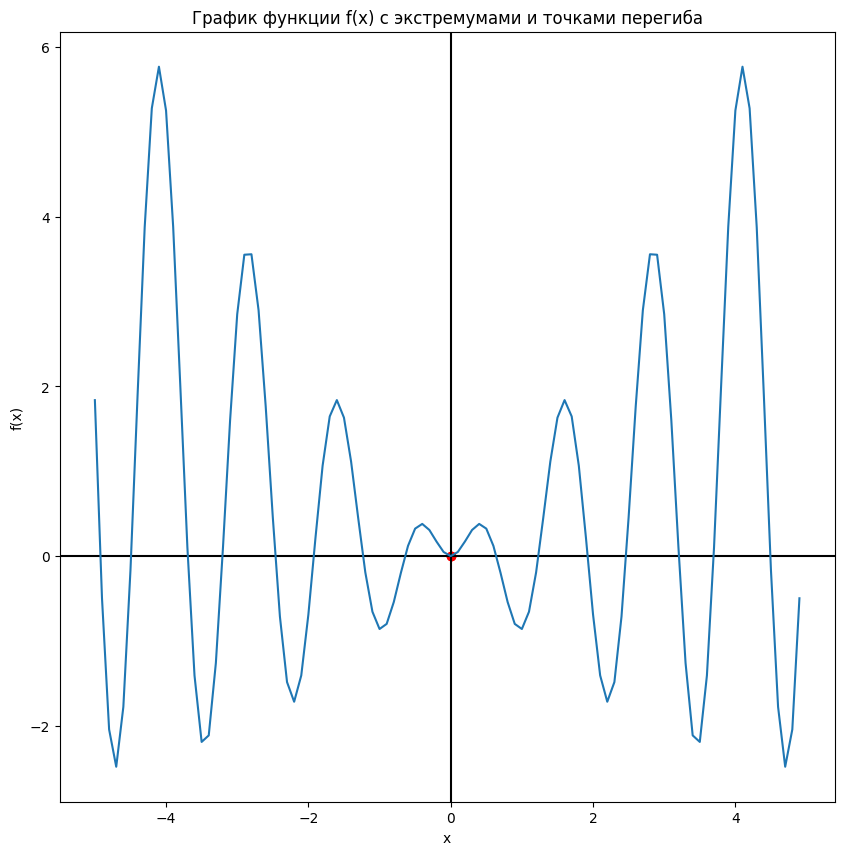

In [208]:
x_curr, weights, trace = gradient_descent(f, df, 0, 0.001, 1e-3, 1000)
print(x_curr)
print(weights)
print(trace)
print(find_points(weights, trace))
GD_graph(weights)

0.934966300528162
[0.5, 0.501304386894763, 0.502628716285480, 0.503973282699697, 0.505338383290982, 0.506724317730896, 0.508131388090459, 0.509559898710535, 0.511010156060520, 0.512482468584719, 0.513977146535756, 0.515494501794353, 0.517034847674789, 0.518598498715327, 0.520185770452900, 0.521796979181284, 0.523432441692027, 0.525092474997342, 0.526777396034182, 0.528487521348706, 0.530223166760323, 0.531984647004504, 0.533772275353566, 0.535586363214589, 0.537427219703700, 0.539295151195899, 0.541190460849665, 0.543113448105594, 0.545064408158321, 0.547043631401056, 0.549051402842064, 0.551088001492501, 0.553153699725051, 0.555248762602907, 0.557373447178673, 0.559528001762902, 0.561712665162049, 0.563927665885740, 0.566173221323391, 0.568449536890327, 0.570756805143740, 0.573095204868932, 0.575464900136540, 0.577866039331564, 0.580298754155292, 0.582763158601384, 0.585259347907677, 0.587787397485467, 0.590347361828352, 0.592939273402951, 0.595563141524172, 0.598218951217943, 0.60090

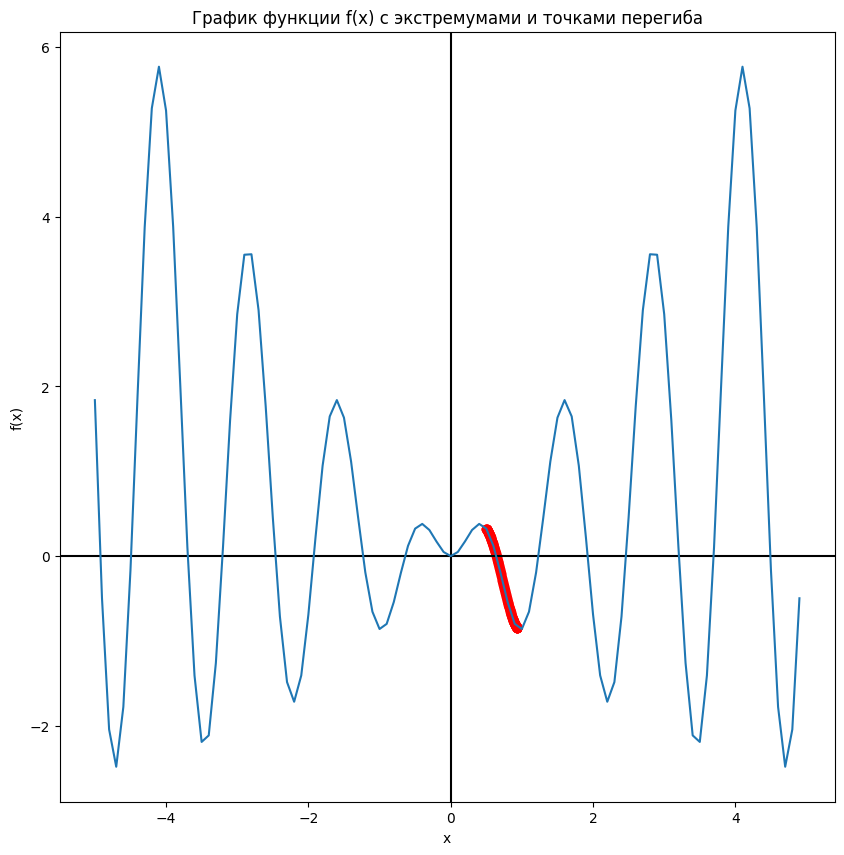

In [209]:
x_curr, weights, trace = gradient_descent(f, df, 0.5, 0.001, 1e-3, 1000)
print(x_curr)
print(weights)
print(trace)
print(find_points(weights, trace))
GD_graph(weights)

1
[1, -0.005*cos(5) - 0.001*sin(5) + 0.9998]
[sin(5) + 0.1, -(-0.005*cos(5) - 0.001*sin(5) + 0.9998)*sin(-4.999 + 0.005*sin(5) + 0.025*cos(5)) + 0.1*(-0.005*cos(5) - 0.001*sin(5) + 0.9998)**2]
Минимум (-0.005*cos(5) - 0.001*sin(5) + 0.9998, -(-0.005*cos(5) - 0.001*sin(5) + 0.9998)*sin(-4.999 + 0.005*sin(5) + 0.025*cos(5)) + 0.1*(-0.005*cos(5) - 0.001*sin(5) + 0.9998)**2)
Максимум (1, sin(5) + 0.1)


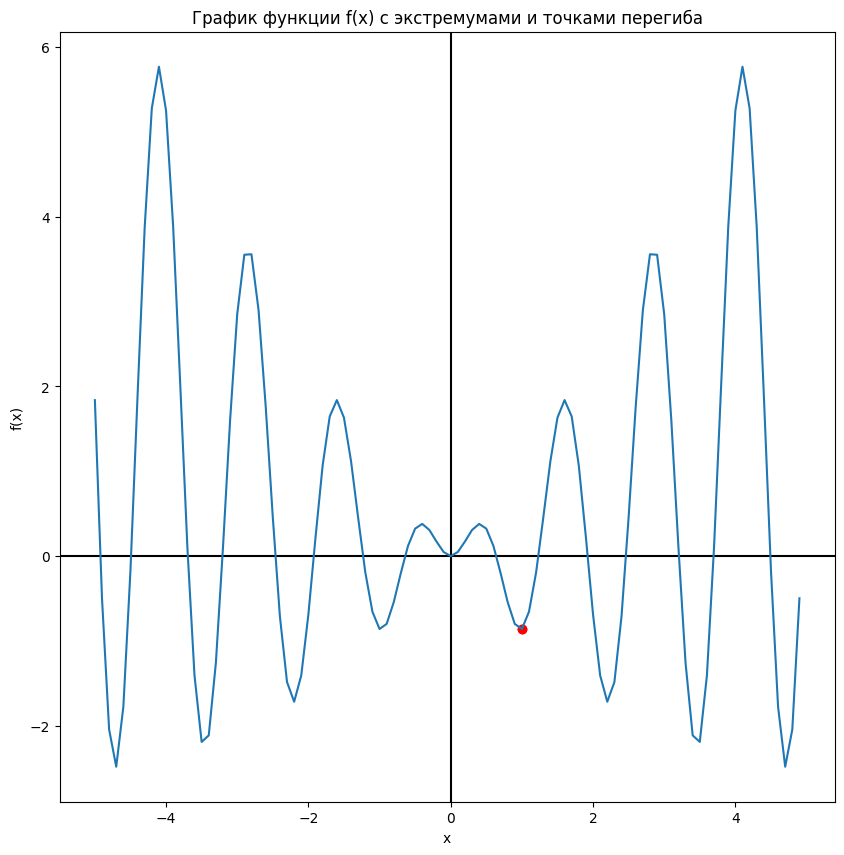

In [210]:
x_curr, weights, trace = gradient_descent(f, df, 1, 0.001, 1e-3, 1000)
print(x_curr)
print(weights)
print(trace)
print(find_points(weights, trace))
GD_graph(weights)

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [591]:
def ols_solution(X, y):
    
    weights = np.linalg.inv(X.T@X) @ (X.T@y)

    return weights

In [609]:
X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          )

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01
    
weights = ols_solution(X, y)
print("Веса линейной регрессии:", weights)

Веса линейной регрессии: [ 10.22495547  84.90744192  84.75606886  97.33587911   0.65252152
  91.77913051 -78.48364028 -48.74296066  14.67107319  42.13070155
  78.26332012]


In [610]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_

array([ 1.02260247e+01,  8.49005801e+01,  8.47675886e+01,  9.73410157e+01,
        6.46558358e-01,  9.17786695e+01, -4.21327890e+13, -4.21327890e+13,
        1.46683981e+01,  4.21343992e+01,  4.21327890e+13])

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    
    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        object_for_SGD = np.random.randint(m)
        params = params - 2./m * learning_rate * X[object_for_SGD]*((X[object_for_SGD] @ params) - y[object_for_SGD])
        cost_track[i] = compute_cost(X[[object_for_SGD]], y, params)

    return cost_track, params


def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [553]:
X = np.linspace(-10,10,100)
print(X.shape)

X = X.reshape(-1, 2)
print(X.shape)

y = X[:, 0] * (np.random.random_sample(X.shape[0]) + 0.5) + X[:, 0] * (np.random.random_sample(X.shape[0]) + 0.3)
print(y.shape)

(100,)
(50, 2)
(50,)


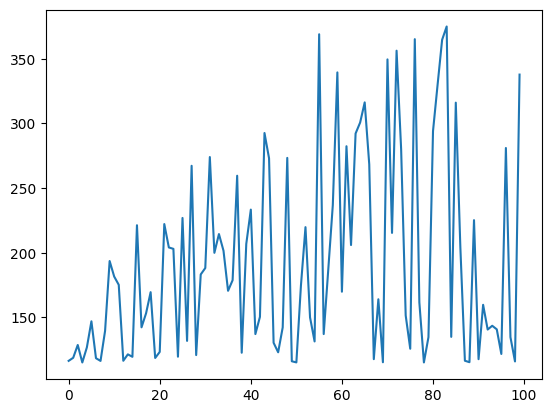

In [555]:
track, weights = stochastic_gradient_descent(X, y, 0.01, 100)
plt.plot(track)

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [612]:
from sklearn.datasets import make_regression

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [611]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost


def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params


def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [613]:
#проверка параметров линейной регрессие склерна
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)

[ 5.68244776e+01  3.34799080e+01 -2.36449410e-01  3.96392245e+01
 -1.31722723e-01  4.91261961e+01 -3.79189104e+13 -3.79189104e+13
  7.92035125e+01  4.24680489e+01  3.79189104e+13]


In [ ]:
#точная формула
start = time.time()
params = ols_solution(X, y)
print(params)
end=time.time()
print()
print(f'R2 score: {r2_score (y, reg.predict(X))}')
print()
print(f'Время работы: {end-start}s')

[ 5.68245579e+01  3.34829181e+01 -2.40654516e-01  3.96452937e+01
 -1.35856167e-01  4.91229595e+01  1.79622850e+02  2.08598541e+02
  7.92038623e+01  4.24712069e+01 -1.09978481e+02]

R2 score: 0.7554623224311858

Время работы: 0.02200460433959961s


In [615]:
#GD
start = time.time()
cost_track, params = gradient_descent(X, y, 0.01, 10000)
print(params)
end=time.time()
print()
print(f'R2 score: {r2_score(y, predict(X, params))}')
print()
print(f'Время работы: {end-start}s')

[-0.78664013 56.82455793 33.48291813 -0.24065452 39.64529367 -0.13585617
 49.12295947 13.84898051 42.82467127 79.20386231 42.4712069  55.79538849]

R2 score: 0.7554626185750483

Время работы: 4.163377523422241s


In [616]:
#SGD
start = time.time()
cost_track, params = stochastic_gradient_descent(X, y, 0.01, 10000)
print(params)
end=time.time()
print()
print(f'R2 score: {r2_score(y, predict(X, params))}')
print()
print(f'Время работы: {end-start}s')

[0.95762857 0.9301642  0.75088474 0.06706736 0.25509452 0.63030941
 0.36054223 0.74739262 0.62812938 1.08196495 0.55600302 0.96797701]

R2 score: 0.023728349100440638

Время работы: 1.3483033180236816s


1) С нахождением минимума справился точный метод и GD. Для SGD слишком мало итераций, т.к. сдвиг происходит только по одному объекту ,а не по всем.

2) быстрее всего отработал точный метод (0.022с), затем SGD (1.348с) - т.к. он пробежался по 10000 объектов, и медленнее всего GD (4.163с) - т.к. ему пришлось считать 10000*100000 (X.shape[0]) объектов

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [623]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, alpha):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    
    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        object_for_SGD = np.random.randint(m)
        params = params - 2./m * learning_rate * (X[object_for_SGD]*((X[object_for_SGD] @ params) - y[object_for_SGD]) + alpha * (params.T@params))
        cost_track[i] = compute_cost(X[[object_for_SGD]], y, params)

    return cost_track, params


def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [627]:
for a in list(np.linspace(0.1, 1, 10)):
    cost_track, params = stochastic_gradient_descent(X, y, 0.01, 10000, a)
    print(f'R2 score при значении alpha {a:.1f}: {r2_score(y, predict(X, params))}')

R2 score при значении alpha 0.1: 0.024677811468703514
R2 score при значении alpha 0.2: 0.021188710682594425
R2 score при значении alpha 0.3: 0.024960160501116824
R2 score при значении alpha 0.4: 0.01607249885903894
R2 score при значении alpha 0.5: 0.02026138247243947
R2 score при значении alpha 0.6: 0.016087483435999306
R2 score при значении alpha 0.7: 0.02141542181212419
R2 score при значении alpha 0.8: 0.015347653726254462
R2 score при значении alpha 0.9: 0.02735448680711461
R2 score при значении alpha 1.0: 0.023433689689587922


Лучшее качество (max r2) при коэффициенте регуляризации alpha = 0.3

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [650]:
def modified_grad_descent(X, y, learning_rate, iterations, beta): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params_t1 = np.random.rand(X.shape[1])
    
    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params_t0=np.zeros(m)
        params_t2 = params_t1 - 2./m * learning_rate * (X.T @ ((X @ params) - y) + beta * (params_t1 - params_t0))
        cost_track[i] = compute_cost(X, y, params_t2)
        params_t0=params_t1
        params_t1=params_t2

    return cost_track, params_t2


def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost# your code here

In [651]:
cost_track, params = stochastic_gradient_descent(X, y, 0.01, 10000, 0.5)
print(f'R2 score with momentum: {r2_score(y, predict(X, params))}')

R2 score with momentum: 0.0265184057079062


## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Цитата: 'все такие методы, как правило, довольно дорогие (исключая L-BFGS), и при большом размере задачи и выборки ничего лучше вариаций SGD не придумали.'


1) Метод Ньютона хорошо сходится **только в окрестности минимума**, а если инициализация произошла далеко от минимума, то поиск оптимального параметра alpha вычислительно трудозатратен. 

2) на каждом шаге градиентного спуска нужно вычислять и обращать Гессиан, что требует __О(n**3) времени и O(n**2) памяти__. Решить линейную регрессию с ~10000 признаками методом Ньютона попросту невозможно.

3) Если Гессиан __не является положительно определенным__, метод не сработает. Как вариант, Гессиан заменяют на что-то похожее, но это уже квазиньютоновские методы

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

In [ ]:
Это кот Сабрины?